# **Density-based spatial clustering of applications with noise (DBSCAN) Clustering**

### **Importing All Necessary Libraries**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

### **Data Framing**

In [26]:
data = pd.read_csv('Clustering_gmm.csv')
data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [27]:
print(f"data shape: {data.shape}\n") # Checking data shape
print(data.isnull().sum(), "\n") # Checking null values
print(data.describe())

data shape: (12000, 2)

Weight    0
Height    0
dtype: int64 

             Weight        Height
count  12000.000000  12000.000000
mean      61.270240    169.515781
std        5.191992      4.800488
min       50.433644    160.182164
25%       57.772791    166.607599
50%       61.961518    169.726252
75%       65.439332    172.837284
max       70.700456    178.894770


### **Standardize the features**

In [28]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Weight', 'Height']])

StandardScaler is used to standardize the features. This step ensures that each feature has a mean of 0 and a standard deviation of 1, which is important for clustering algorithms.

### **Create a DBSCAN model**

In [29]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_scaled)
labels = dbscan.labels_

Parameters: eps=0.5 (maximum distance for points in the same neighborhood), min_samples=5 (minimum number of points to form a core point).

labels = dbscan.labels_ assigns cluster labels to each data point; -1 indicates noise points.

Core Points: Have at least min_samples neighbors within eps distance.

Border Points: Within eps distance of a core point but do not meet min_samples.

### **Adding the cluster labels to the dataframe**

In [30]:
data['Cluster'] = labels
data

,Weight,Height,Cluster
0,67.062924,176.086355,0
1,68.804094,178.388669,0
2,60.930863,170.284496,0
3,59.733843,168.691992,0
4,65.431230,173.763679,0
...,...,...,...
11995,59.976983,169.679741,0
11996,66.423814,174.625574,0
11997,53.604698,161.919208,1
11998,50.433644,160.794875,1


### **Create a mesh grid over the data points**

In [31]:
h = 0.02  # step size in the mesh
x_min, x_max = data_scaled[:, 0].min() - 1, data_scaled[:, 0].max() + 1
y_min, y_max = data_scaled[:, 1].min() - 1, data_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Step Size (h):
h = 0.02 defines the spacing between points in the mesh.

Data Range:
x_min, x_max: Minimum and maximum values of the first column ([:, 0]) of data_scaled.
y_min, y_max: Minimum and maximum values of the second column ([:, 1]) of data_scaled.

Meshgrid Creation:
np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) creates a grid of points covering the ranges defined by x_min, x_max, y_min, and y_max, with a spacing of h.

### **Predict cluster labels for each point in the mesh**

In [32]:
sample_points = np.c_[xx.ravel(), yy.ravel()]

xx and yy are meshgrid arrays created for the purpose of visualization. ravel() flattens these arrays, and np.c_ concatenates them column-wise to create an array where each row represents a coordinate pair in the 2D space.

In [33]:
predicted_labels = []
batch_size = 1000
for i in range(0, len(sample_points), batch_size):
    batch_points = sample_points[i:i + batch_size]
    batch_labels = dbscan.fit_predict(batch_points)
    predicted_labels.extend(batch_labels)

predicted_labels stores the predicted cluster labels.

batch_size determines how many points will be processed in each iteration.

The loop iterates through sample_points in batches of batch_size.

For each batch of points (batch_points), DBSCAN's fit_predict() method is called to predict cluster labels for the batch.

The predicted labels for the batch (batch_labels) are then appended to predicted_labels using extend().

In [34]:
Z = np.array(predicted_labels).reshape(xx.shape)

predicted_labels is converted into a numpy array and reshaped to match the shape of xx.

This reshaping operation (reshape(xx.shape)) transforms the 1D array of predicted labels back into the original 2D meshgrid shape (xx.shape), effectively assigning cluster labels back to their corresponding coordinates in the 2D space.


Purpose: Classify a grid of points (xx, yy) using DBSCAN clustering.

Sampling: Generate a grid of points sample_points from xx and yy.

Batch Processing: Process points in batches of 1000 (batch_size).

Label Prediction: Use DBSCAN (dbscan) to predict labels for each batch of points.

Aggregation: Extend predicted labels into predicted_labels list.

Result: Reshape predicted_labels into array Z matching the shape of xx.

### **Plot the density boundary and clustering result**

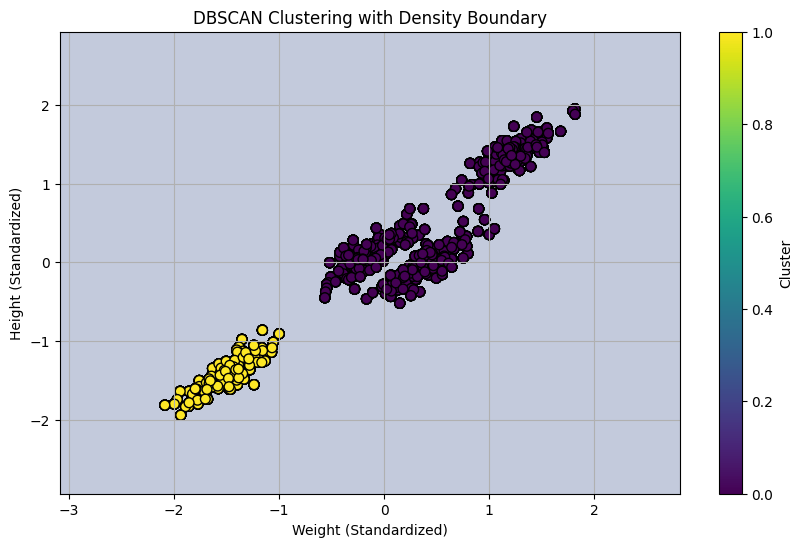

In [35]:
# Plot the density boundary and clustering result
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering with Density Boundary')
plt.xlabel('Weight (Standardized)')
plt.ylabel('Height (Standardized)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

cmap='viridis': Specifies the colormap to be used for coloring the contours. Here, 'viridis' is a perceptually uniform colormap.

alpha=0.3: Sets the transparency level of the filled contours. An alpha value of 0.3 means the contours will be somewhat transparent.

edgecolor='k': Specifies the edge color of the markers as black ('k').

s=50: Sets the size of the markers to 50 points